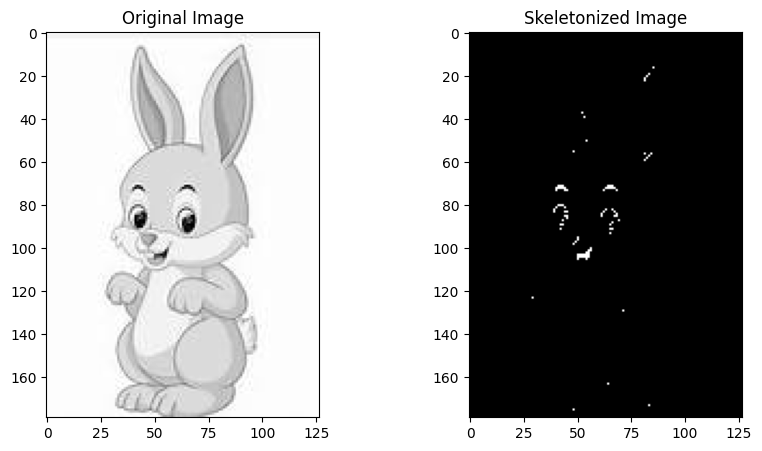

In [3]:
import cv2
import numpy as np
from google.colab import files


# Fungsi untuk melakukan skeletonization
def skeletonize(image):
    # Konversi gambar menjadi gambar biner
    ret, img = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Inversi gambar
    img = cv2.bitwise_not(img)

    # Inisialisasi kernel
    kernel = np.ones((3,3), np.uint8)

    # Inisialisasi gambar kosong untuk menyimpan hasil skeletonization
    skeleton = np.zeros(img.shape, np.uint8)

    while True:
        # Erosi gambar dengan kernel
        eroded = cv2.erode(img, kernel)
        # Dilasi hasil erosi dengan kernel yang sama
        temp = cv2.dilate(eroded, kernel)
        # Substract hasil dilasi dari gambar asli
        temp = cv2.subtract(img, temp)
        # Gabungkan hasil substract dengan hasil skeletonization sebelumnya
        skeleton = cv2.bitwise_or(skeleton, temp)
        # Update gambar asli
        img = eroded.copy()

        # Cek apakah tidak ada lagi perubahan pada gambar
        if cv2.countNonZero(img) == 0:
            break

    return skeleton

# Baca gambar
image = cv2.imread('kelinci.jpg', cv2.IMREAD_GRAYSCALE)

# Lakukan skeletonization
skeleton = skeletonize(image)

# Tampilkan gambar asli dan hasil skeletonization
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap='gray')
plt.title('Skeletonized Image')

plt.show()